In [1]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles, JLD2
include("src/basic_CPHL_utils.jl")
include("src/CPHL_module.jl")

N_g = 100;
g_vals = collect(range(-1, 1; length = N_g + 2)[2:end-1]);
N_sites = 5
cphl = CPHL.CPHLSolver(N_sites, g_vals);
CPHL.SetUpHamiltonians(cphl);
OString_bare_vals = copy(cphl.OString_GS_vals)
ZZ_bare_vals = copy(cphl.ZZ_GS_vals)

100-element Vector{Float64}:
 0.020000124997656393
 0.04040507093529734
 0.061228075043630245
 0.08248298946630597
 0.10418431829663416
 0.12634725730340415
 0.14898773887587077
 0.17212257655416516
 0.19576919555843214
 0.21994609185798264
 0.24467265791102172
 0.2699692975862688
 0.2958574949235495
 ⋮
 3.9678717477535033
 3.97365651878969
 3.978742450770196
 3.983178451392136
 3.987008707455828
 3.9902732879889156
 3.9930086685799226
 3.9952497124807467
 3.997022904844819
 3.9983596876524294
 3.9992857168810954
 3.999824995781035

In [3]:
cphl.OStringWeight = .5
@load "DATA/ALPHAMat_$(N_sites)_$(cphl.OStringWeight).jld2" ALPHAMat

cphl.ALPHAMat = ALPHAMat
CPHL.SetUpHamiltonians(cphl);


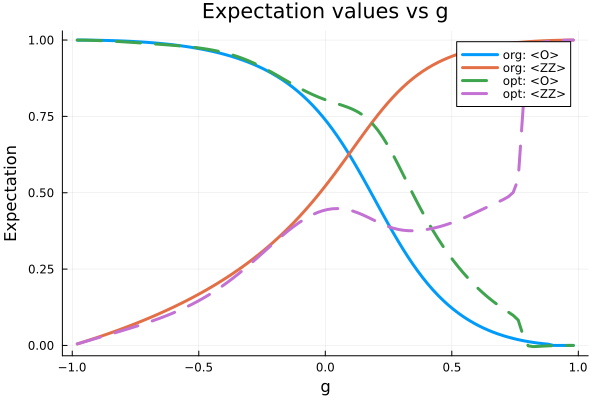

In [4]:
p = plot(cphl.g_vals, OString_bare_vals, label="org: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3);
plot!(p, cphl.g_vals, ZZ_bare_vals / (cphl.N_sites - 1), label="org: <ZZ>", linewidth=3);

plot!(p, cphl.g_vals, cphl.OString_GS_vals, label="opt: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3, linestyle = :dash);
plot!(p, cphl.g_vals, cphl.ZZ_GS_vals / (cphl.N_sites - 1), label="opt: <ZZ>", linewidth=3, linestyle = :dash);
display(p)